# Introduction to Artificial Neural Networks

In [1]:
!pip install --upgrade jax jaxlib
!conda install -y -c plotly plotly plotly-orca retrying

     |████████████████████████████████| 951 kB 10.9 MB/s 


     |██▌                             | 5.5 MB 89.4 MB/s eta 0:00:01

     |█████▊                          | 12.4 MB 89.4 MB/s eta 0:00:01

     |█████████                       | 19.3 MB 89.4 MB/s eta 0:00:01

     |████████████▎                   | 26.5 MB 89.4 MB/s eta 0:00:01

     |███████████████▉                | 34.1 MB 89.4 MB/s eta 0:00:01

     |███████████████████▎            | 41.5 MB 89.4 MB/s eta 0:00:01

     |██████████████████████▊         | 48.9 MB 89.4 MB/s eta 0:00:01

     |██████████████████████████      | 56.3 MB 89.4 MB/s eta 0:00:01

     |█████████████████████████████▋  | 63.8 MB 89.4 MB/s eta 0:00:01

     |████████████████████████████████| 69.0 MB 89.4 MB/s eta 0:00:01

     |████████████████████████████████| 69.0 MB 89.4 MB/s 


     |████████████████████████████████| 123 kB 107.0 MB/s 


     |████████████████████████████████| 65 kB 11.8 MB/s 


 \

 |

 /

 -

 \

 |

 /

 done
  Created wheel for jax: filename=jax-0.3.13-py3-none-any.whl size=1099581 sha256=58212b1e8fa8c351697bb6f31271fd922ee13b32c0d8e860d1a7c334a0483280
  Stored in directory: /home/runner/.cache/pip/wheels/5c/66/0b/708f550c1aad997145663cd30f8f5ddf6deeb4598a7b513f49
Successfully built jax


\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

done
Solving environment: - 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

done



## Package Plan ##

  environment location: /usr/share/miniconda3/envs/quantecon

  added / updated specs:
    - plotly
    - plotly-orca
    - retrying


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    plotly-5.8.2               |             py_0         7.0 MB  plotly
    plotly-orca-1.3.1          |                1        56.6 MB  plotly
    retrying-1.3.3             |     pyhd3eb1b0_2          14 KB
    ------------------------------------------------------------
                                           Total:        63.6 MB

The following NEW packages will be INSTALLED:

  plotly-orca        plotly/linux-64::plotly-orca-1.3.1-1
  retrying           pkgs/main/noarch::retrying-1.3.3-pyhd3eb1b0_2

The following packages will be UPDATED:

  plotly               pkgs/main::plotly-5.6.0-pyhd3eb1b0_0 --> plotly::plotly-5.8.2-py_0



plotly-5.8.2         | 7.0 MB    |                 

plotly-5.8.2         | 7.0 MB    | ##################################### | 100% 
plotly-orca-1.3.1    | 56.6 MB   |                                       |   0% 

plotly-orca-1.3.1    | 56.6 MB   | ##################################### | 100% 


retrying-1.3.3       | 14 KB     |                                       |   0% 

retrying-1.3.3       | 14 KB     | ##################################### | 100% 
Preparing transaction: \ 

| 

/ 

- 

\ 

| 

/ 

- 

done
Verifying transaction: | 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

done
Executing transaction: | 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

done


## Overview

Substantial parts of **machine learning** and **artificial intelligence** are about 

* approximating an unknown function with a known function
* estimating the known function from a set of data on the left- and right-hand variables

This lecture describes the structure of a plain vanilla **artificial neural network**  (ANN) of a type that is widely used to 
approximate a function $f$ that maps   $x$ in  a space $X$ into  $y$ in a space $Y$.  

To introduce elementary concepts, we study an example in which $x$ and $y$ are scalars.

We'll describe the following concepts that are brick and mortar for neural networks:
 * a neuron
 * an activation function
 * a network of neurons 
 * A neural network as a composition of functions
 * back-propagation and its relationship  to the chain rule of differential calculus
 

## A Deep (but not Wide) Artificial Neural Network

We describe a  "deep" neural network of "width" one.  

**Deep** means that the network composes a large number of functions organized into nodes of a graph.

**Width** refers to the number of right hand  side variables on the right hand side of the function being approximated.

Setting "width" to one means that the network    composes just univariate functions.

Let $x \in \mathbb{R}$ be a scalar and $y \in \mathbb{R}$ be another scalar.

We assume  that $y$ is  a nonlinear function of $x$:

$$
y = f(x)
$$

We want to approximate  $f(x)$ with another function that we define recursively.

For a network of depth $N \geq 1$, each **layer** $i =1, \ldots N$ consists of 

* an input $x_i$

* an **affine function** $w_i x_i + bI$, where $w_i$ is a scalar **weight** placed on the input $x_i$ and $b_i$ is a scalar **bias**

* an **activation function** $h_i$ that takes $(w_i x_i + b_i)$ as an argument and produces an output $x_{i+1}$
   
     
An example of an activation function $h$ is the **sigmoid** function

$$
h (z) = \frac{1}{1 + e^{-z}} 
$$


Another popular activation function is the **rectified linear unit** (ReLU) function

$$
h(z) = \max (0, z) 
$$


Yet another activation function is the identity function

$$ 
h(z) = z 
$$

As activation functions below, we'll use the sigmoid function for layers $1$ to $N-1$ and the identity function for  layer $N$.

To approximate a function $f(x)$ we construct   $\hat f(x)$  by proceeding as follows.

Let 

$$
 l_{i}\left(x\right)=w_{i}x+b_{i} . 
$$ 

We construct  $\hat f$ by iterating on compositions of functions $h_i \circ l_i$:

$$
f(x)\approx\hat{f}(x)=h_{N}\circ l_{N}\circ h_{N-1}\circ l_{1}\circ\cdots\circ h_{1}\circ l_{1}(x)
$$

If $N >1$, we call the right side a "deep" neural net.

The larger is the integer $N$, the "deeper" is the neural net.

Evidently,  if we know  the parameters $\{w_i, b_i\}_{i=1}^N$, then we can compute
$\hat f(x)$ for a given $x = \tilde x$ by iterating on the recursion

$$
x_{i+1} = h_i \circ l_i(x_i) , \quad, i = 1, \ldots N
$$ (eq:recursion)

starting from $x_1 = \tilde x$.  

The value of $x_{N+1}$ that emerges from this iterative scheme
equals $\hat f(\tilde x)$.

## Calibrating  Parameters


We now consider a  neural network like the one describe above  with width 1, depth $N$,  and activation functions $h_{i}$ for $1\leqslant i\leqslant N$ that map $\mathbb{R}$ into itself.


Let $\left\{ \left(w_{i},b_{i}\right)\right\} _{i=1}^{N}$ denote a sequence of weights and biases.

As mentioned above, for a given input $x_{1}$, our approximating function $\hat f$ evaluated
at $x_1$ equals the "output" $x_{N+1}$ from our network that  can be computed by iterating on $x_{i+1}=h_{i}\left(w_{i}x_{i}+b_{i}\right)$.

For a given **prediction** $\hat{y} (x) $ and **target** $y= f(x)$, consider the loss function

$$
\mathcal{L} \left(\hat{y},y\right)(x)=\frac{1}{2}\left(\hat{y}-y\right)^{2}(x) .
$$

This criterion is a function of the parameters $\left\{ \left(w_{i},b_{i}\right)\right\} _{i=1}^{N}$
and the point $x$.

We're interested in solving the following problem:

$$
\min_{\left\{ \left(w_{i},b_{i}\right)\right\} _{i=1}^{N}} \int {\mathcal L}\left(x_{N+1},y\right)(x) d \mu(x)
$$

where $\mu(x)$ is some measure of  points $x \in \mathbb{R}$ over which we want a good approximation $\hat f(x)$ to $f(x)$.

Stack  weights and biases into a vector of parameters $p$:

$$ 
p = \begin{bmatrix}     
  w_1 \cr 
  b_1 \cr
  w_2 \cr
  b_2 \cr
  \vdots \cr
  w_N \cr
  b_N 
\end{bmatrix}
$$


Applying a "poor man's version" of a **stochastic gradient descent** algorithm for finding a zero of a function leads to the following update rule for parameters:

$$
p_{k+1}=p_k-\alpha\frac{d \mathcal{L}}{dx_{N+1}}\frac{dx_{N+1}}{dp_k}
$$ (eq:sgd)

where $\frac{d {\mathcal L}}{dx_{N+1}}=-\left(x_{N+1}-y\right)$ and $\alpha > 0 $ is a step size.

(See [this](https://en.wikipedia.org/wiki/Gradient_descent#Description) and [this](https://en.wikipedia.org/wiki/Newton%27s_method) to gather insights about how stochastic gradient descent
relates to Newton's method.)

To implement one step of this parameter update rule, we want  the vector of derivatives $\frac{dx_{N+1}}{dp_k}$.

In the neural network literature, this step is accomplished by what is known as **back propagation**.

## Back Propagation and the Chain Rule

Thanks to  properties of

* the chain and product rules for differentiation from differential calculus, and

* lower triangular matrices
   
back propagation can actually be  accomplished in one step by

 *  inverting a lower triangular matrix,  and 
 
 * matrix multiplication

(This idea  is from the last 7 minutes of this great youtube video by MIT's Alan Edelman)

```{youtube} rZS2LGiurKY
```


Here goes.





Define the derivative of $h(z)$ with respect to $z$ evaluated at $z = z_i$  as $\delta_i$:

$$
\delta_i = \frac{d}{d z} h(z)|_{z=z_i}
$$

or 

$$
\delta_{i}=h'\left(w_{i}x_{i}+b_{i}\right). 
$$ 

Repeated application of the chain rule and product rule to our recursion {eq}`eq:recursion` allows us to obtain:

$$
dx_{i+1}=\delta_{i}\left(dw_{i}x_{i}+w_{i}dx_{i}+b_{i}\right)
$$

After imposing $dx_{1}=0$, we get the following system of equations:

$$
\left(\begin{array}{c}
dx_{2}\\
\vdots\\
dx_{N+1}
\end{array}\right)=\underbrace{\left(\begin{array}{ccccc}
\delta_{1}w_{1} & \delta_{1} & 0 & 0 & 0\\
0 & 0 & \ddots & 0 & 0\\
0 & 0 & 0 & \delta_{N}w_{N} & \delta_{N}
\end{array}\right)}_{D}\left(\begin{array}{c}
dw_{1}\\
db_{1}\\
\vdots\\
dw_{N}\\
db_{N}
\end{array}\right)+\underbrace{\left(\begin{array}{cccc}
0 & 0 & 0 & 0\\
w_{2} & 0 & 0 & 0\\
0 & \ddots & 0 & 0\\
0 & 0 & w_{N} & 0
\end{array}\right)}_{L}\left(\begin{array}{c}
dx_{2}\\
\vdots\\
dx_{N+1}
\end{array}\right)
$$ 

or

$$
d x = D dp + L dx
$$

which implies that

$$
dx = (I -L)^{-1} D dp
$$

which in turn  implies

$$
\left(\begin{array}{c}
dx_{N+1}/dw_{1}\\
dx_{N+1}/db_{1}\\
\vdots\\
dx_{N+1}/dw_{N}\\
dx_{N+1}/db_{N}
\end{array}\right)=e_{N}\left(I-L\right)^{-1}D.
$$

We can then solve the above problem by applying our update for $p$ multiple times for a collection of input-output pairs $\left\{ \left(x_{1}^{i},y^{i}\right)\right\} _{i=1}^{M}$ that we'll call our "training set".



## Training Set

Choosing a  training set amounts to a choice of measure $\mu$ in the above  formulation of our  function approximation problem as a minimization problem.

In this spirit,  we shall use a uniform grid of, say, 50 or 200 points. 

There are many possible approaches to the minimization  problem posed above:

* batch gradient descent in which you use an average gradient over the training set

* stochastic gradient descent in which you sample points randomly and use individual gradients

* something in-between (so-called "mini-batch gradient descent")
 
The update rule {eq}`eq:sgd` described above  amounts  to a stochastic gradient descent algorithm.

In [2]:
from IPython.display import Image
import jax.numpy as jnp
from jax import grad, jit, jacfwd, vmap
from jax import random
import jax
import plotly.graph_objects as go

In [3]:
# A helper function to randomly initialize weights and biases
# for a dense neural network layer
def random_layer_params(m, n, key, scale=1.):
    w_key, b_key = random.split(key)
    return scale * random.normal(w_key, (n, m)), scale * random.normal(b_key, (n,))

# Initialize all layers for a fully-connected neural network with sizes "sizes"
def init_network_params(sizes, key):
    keys = random.split(key, len(sizes))
    return [random_layer_params(m, n, k) for m, n, k in zip(sizes[:-1], sizes[1:], keys)]

In [4]:
def compute_xδw_seq(params, x):
    # Initialize arrays
    δ = jnp.zeros(len(params))
    xs = jnp.zeros(len(params) + 1)
    ws = jnp.zeros(len(params))
    bs = jnp.zeros(len(params))
    
    h = jax.nn.sigmoid
    
    xs = xs.at[0].set(x)
    for i, (w, b) in enumerate(params[:-1]):
        output = w * xs[i] + b
        activation = h(output[0, 0])
        
        # Store elements
        δ = δ.at[i].set(grad(h)(output[0, 0]))
        ws = ws.at[i].set(w[0, 0])
        bs = bs.at[i].set(b[0])
        xs = xs.at[i+1].set(activation)

    final_w, final_b = params[-1]
    preds = final_w * xs[-2] + final_b
    
    # Store elements
    δ = δ.at[-1].set(1.)
    ws = ws.at[-1].set(final_w[0, 0])
    bs = bs.at[-1].set(final_b[0])
    xs = xs.at[-1].set(preds[0, 0])
    
    return xs, δ, ws, bs
    

def loss(params, x, y):
    xs, δ, ws, bs = compute_xδw_seq(params, x)
    preds = xs[-1]
    
    return 1 / 2 * (y - preds) ** 2

In [5]:
# Parameters
N = 3  # Number of layers
layer_sizes = [1, ] * (N + 1)
param_scale = 0.1
step_size = 0.01
params = init_network_params(layer_sizes, random.PRNGKey(1))

In [6]:
x = 5
y = 3
xs, δ, ws, bs = compute_xδw_seq(params, x)

In [7]:
dxs_ad = jacfwd(lambda params, x: compute_xδw_seq(params, x)[0], argnums=0)(params, x)
dxs_ad_mat = jnp.block([dx.reshape((-1, 1)) for dx_tuple in dxs_ad for dx in dx_tuple ])[1:]

In [8]:
jnp.block([[δ * xs[:-1]], [δ]])

DeviceArray([[8.5726520e-03, 4.0850646e-04, 6.1021698e-01],
             [1.7145304e-03, 2.3785222e-01, 1.0000000e+00]],            dtype=float32)

In [9]:
L = jnp.diag(δ * ws, k=-1)
L = L[1:, 1:]

D = jax.scipy.linalg.block_diag(*[row.reshape((1, 2)) for row in jnp.block([[δ * xs[:-1]], [δ]]).T])

dxs_la = jax.scipy.linalg.solve_triangular(jnp.eye(N) - L, D, lower=True)

In [10]:
# Check that the `dx` generated by the linear algebra method
# are the same as the ones generated using automatic differentiation
jnp.max(jnp.abs(dxs_ad_mat - dxs_la))

DeviceArray(9.313226e-10, dtype=float32)

In [11]:
grad_loss_ad = jnp.block([dx.reshape((-1, 1)) for dx_tuple in grad(loss)(params, x, y) for dx in dx_tuple ])

In [12]:
# Check that the gradient of the loss is the same for both approaches
jnp.max(jnp.abs(-(y - xs[-1]) * dxs_la[-1] - grad_loss_ad))

DeviceArray(1.4901161e-08, dtype=float32)

In [13]:
@jit
def update_ad(params, x, y):
    grads = grad(loss)(params, x, y)
    return [(w - step_size * dw, b - step_size * db)
          for (w, b), (dw, db) in zip(params, grads)]

@jit
def update_la(params, x, y):
    xs, δ, ws, bs = compute_xδw_seq(params, x)
    N = len(params)
    L = jnp.diag(δ * ws, k=-1)
    L = L[1:, 1:]

    D = jax.scipy.linalg.block_diag(*[row.reshape((1, 2)) for row in jnp.block([[δ * xs[:-1]], [δ]]).T])
    
    dxs_la = jax.scipy.linalg.solve_triangular(jnp.eye(N) - L, D, lower=True)
    
    grads = -(y - xs[-1]) * dxs_la[-1]
    
    return [(w - step_size * dw, b - step_size * db) 
            for (w, b), (dw, db) in zip(params, grads.reshape((-1, 2)))]
    

In [14]:
# Check that both updates are the same
update_la(params, x, y)

[(DeviceArray([[-1.3489482]], dtype=float32),
  DeviceArray([0.37956238], dtype=float32)),
 (DeviceArray([[-0.00782906]], dtype=float32),
  DeviceArray([0.44972023], dtype=float32)),
 (DeviceArray([[0.22937916]], dtype=float32),
  DeviceArray([-0.04793657], dtype=float32))]

In [15]:
update_ad(params, x, y)

[(DeviceArray([[-1.3489482]], dtype=float32),
  DeviceArray([0.37956238], dtype=float32)),
 (DeviceArray([[-0.00782906]], dtype=float32),
  DeviceArray([0.44972023], dtype=float32)),
 (DeviceArray([[0.22937916]], dtype=float32),
  DeviceArray([-0.04793657], dtype=float32))]

## Example 1

Consider the function 

$$
f\left(x\right)=-3x+2
$$

on $\left[0.5,3\right]$. 

We use a uniform grid of 200 points and update the parameters for each point on the grid 300 times. 

$h_{i}$ is the sigmoid activation function for all layers except the final one for which we use the identity function and $N=3$.

Weights are initialized randomly.

In [16]:
def f(x):
    return -3 * x + 2

M = 200
grid = jnp.linspace(0.5, 3, num=M)
f_val = f(grid)

In [17]:
indices = jnp.arange(M)
key = random.PRNGKey(0)

def train(params, grid, f_val, key, num_epochs=300):
    for epoch in range(num_epochs):
        key, _ = random.split(key)
        random_permutation = random.permutation(random.PRNGKey(1), indices)
        for x, y in zip(grid[random_permutation], f_val[random_permutation]):
            params = update_la(params, x, y)
            
    return params 

In [18]:
# Parameters
N = 3  # Number of layers
layer_sizes = [1, ] * (N + 1)
params_ex1 = init_network_params(layer_sizes, key)

In [19]:
%%time 
params_ex1 = train(params_ex1, grid, f_val, key, num_epochs=500)

CPU times: user 4.05 s, sys: 8.11 ms, total: 4.05 s
Wall time: 4.05 s


In [20]:
predictions = vmap(compute_xδw_seq, in_axes=(None, 0))(params_ex1, grid)[0][:, -1]

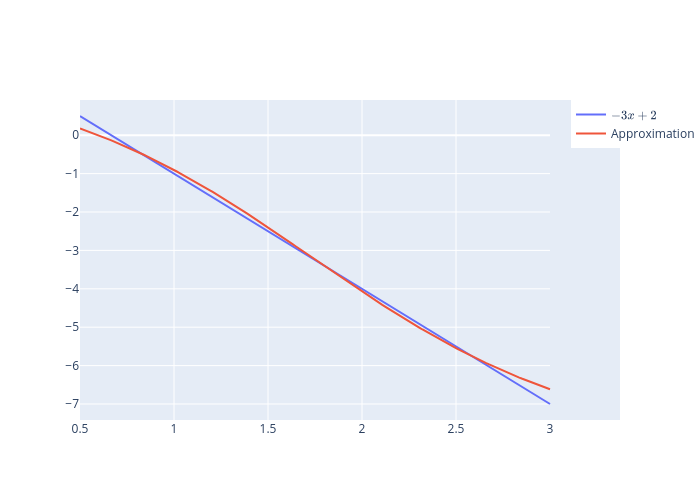

In [21]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=grid, y=f_val, name=r'$-3x+2$'))
fig.add_trace(go.Scatter(x=grid, y=predictions, name='Approximation'))

# Export to PNG file
Image(fig.to_image(format="png"))
# fig.show() will provide interactive plot when running
# notebook locally

## How Deep? 

It  is  fun to think about how deepening the neural net for the above example affects the quality of  approximation 


* If the network is too deep, you'll run into the [vanishing gradient problem](http://neuralnetworksanddeeplearning.com/chap5.html)
* Other parameters such as the step size and the number of epochs can be as  important or more important than the number of layers in the situation considered in this lecture.
* Indeed, since $f$ is a linear function of $x$, a one-layer network with the identity map as an activation would probably work best. 
  



## Example 2

We use the same setup as for the previous example with

$$
f\left(x\right)=\log\left(x\right)
$$

In [22]:
def f(x):
    return jnp.log(x)

grid = jnp.linspace(0.5, 3, num=M)
f_val = f(grid)

In [23]:
# Parameters
N = 1  # Number of layers
layer_sizes = [1, ] * (N + 1)
params_ex2_1 = init_network_params(layer_sizes, key)

In [24]:
# Parameters
N = 2  # Number of layers
layer_sizes = [1, ] * (N + 1)
params_ex2_2 = init_network_params(layer_sizes, key)

In [25]:
# Parameters
N = 3  # Number of layers
layer_sizes = [1, ] * (N + 1)
params_ex2_3 = init_network_params(layer_sizes, key)

In [26]:
params_ex2_1 = train(params_ex2_1, grid, f_val, key, num_epochs=300)

In [27]:
params_ex2_2 = train(params_ex2_2, grid, f_val, key, num_epochs=300)

In [28]:
params_ex2_3 = train(params_ex2_3, grid, f_val, key, num_epochs=300)

In [29]:
predictions_1 = vmap(compute_xδw_seq, in_axes=(None, 0))(params_ex2_1, grid)[0][:, -1]
predictions_2 = vmap(compute_xδw_seq, in_axes=(None, 0))(params_ex2_2, grid)[0][:, -1]
predictions_3 = vmap(compute_xδw_seq, in_axes=(None, 0))(params_ex2_3, grid)[0][:, -1]

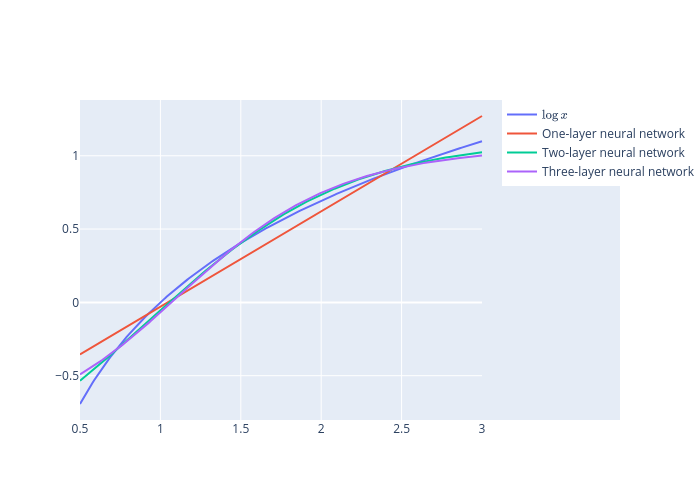

In [30]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=grid, y=f_val, name=r'$\log{x}$'))
fig.add_trace(go.Scatter(x=grid, y=predictions_1, name='One-layer neural network'))
fig.add_trace(go.Scatter(x=grid, y=predictions_2, name='Two-layer neural network'))
fig.add_trace(go.Scatter(x=grid, y=predictions_3, name='Three-layer neural network'))

# Export to PNG file
Image(fig.to_image(format="png"))
# fig.show() will provide interactive plot when running
# notebook locally

In [31]:
## to check that gpu is activated in environment

from jax.lib import xla_bridge
print(xla_bridge.get_backend().platform)

cpu


```{note}
**Cloud Environment:** This lecture site is built in a server environment that doesn't have access to a `gpu`
If you run this lecture locally this lets you know where your code is being executed, either
via the `cpu` or the `gpu`
```